In [1]:
import mountaincar
import numpy as np
import starter as st
import matplotlib.pyplot as plt
%matplotlib inline

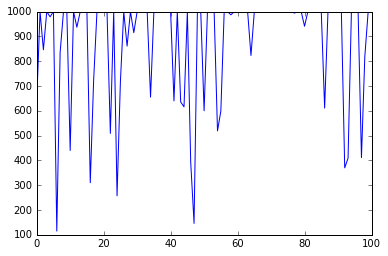

In [2]:
agent = st.Agent()
learning_curve = agent.learn(n_trials=100)
plt.plot(learning_curve)

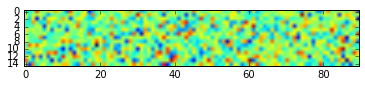

In [3]:
W = agent.net.W[0]
nx_d = agent.net.nx_d
nx = agent.net.nx
W = W.reshape(nx_d, nx)
plt.imshow(W)
plt.show()

# 1. Escape latency vs. trial number (i.e., learning curve)

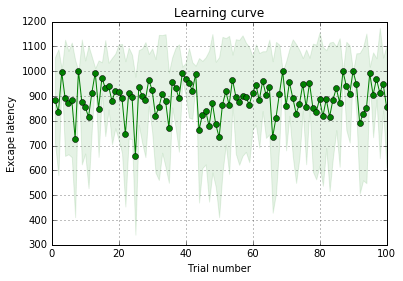

In [8]:
n_agents, n_trials, n_steps  = [10, 100, 1000]
learning_curves = np.zeros((n_agents, n_trials))
for i in range(n_agents):
    agent = st.Agent()
    learning_curves[i, :] = agent.learn(n_trials=n_trials, n_steps=n_steps)
st.plot_learning_curves(learning_curves)
plt.show()

# 2. Policy vs. state

In [2]:
agent = st.Agent()

* Initial vector field

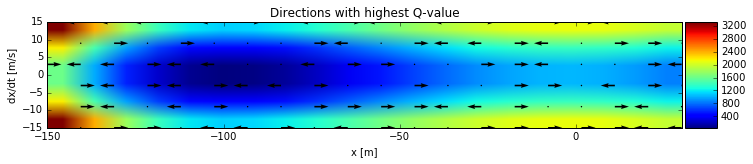

In [3]:
st.plot_vector_field(agent)
plt.show()

* After 10 trials 

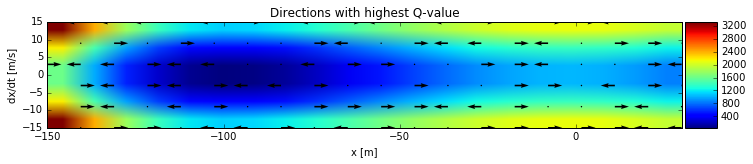

In [4]:
agent.learn(n_trials=10)
st.plot_vector_field(agent)
plt.show()

* After 10 trials 

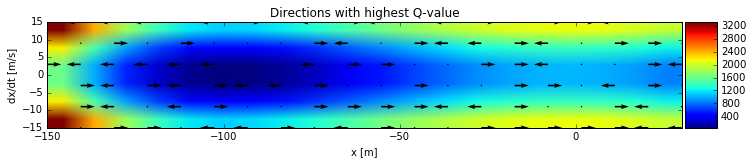

In [5]:
agent.learn(n_trials=10)
st.plot_vector_field(agent)
plt.show()

* After 10 trials 

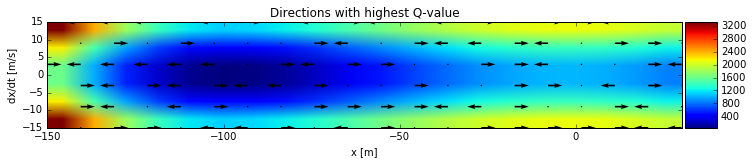

In [6]:
agent.learn(n_trials=10)
st.plot_vector_field(agent)
plt.show()

# 3. Exploration vs. exploitation (temperature parameter)

* $\tau = 1$

In [ ]:
learning_curves = st.batch_agents(temp=1)
st.plot_learning_curves(learning_curves)
plt.show()

* $\tau = \infty$

In [ ]:
learning_curves = st.batch_agents(temp=np.inf)
st.plot_learning_curves(learning_curves)
plt.show()

* $\tau = 0$

In [ ]:
learning_curves = st.batch_agents(temp=0)
st.plot_learning_curves(learning_curves)
plt.show()

* Time decaying $\tau$

In [ ]:
# Linear decay
learning_curves = st.batch_agents(temp=1e3, temp_fun=st.lin_temp_decay)
st.plot_learning_curves(learning_curves)
plt.show()

In [ ]:
# Exponential decay
learning_curves = st.batch_agents(temp=1e3, temp_fun=st.exp_temp_decay)
st.plot_learning_curves(learning_curves)
plt.show()

# 4. Effect of eligibility trace decay rate on learning curves

* $\lambda = 0.95$

In [ ]:
learning_curves = st.batch_agents(el_tr_rate=0.95)
st.plot_learning_curves(learning_curves)
plt.show()

* $\lambda = 0$

In [ ]:
learning_curves = st.batch_agents(el_tr_rate=0.0)
st.plot_learning_curves(learning_curves)
plt.show()

# 5. Effect of the initialization of weights on learning curves

* $w_{a_i, j} = 0, \forall i,j$

In [ ]:
learning_curves = st.batch_agents(W=np.zeros((3, 90*15)))
st.plot_learning_curves(learning_curves)
plt.show()

* $w_{a_i, j} = 1, \forall i,j$

In [ ]:
learning_curves = st.batch_agents(W=np.ones((3, 90*15)))
st.plot_learning_curves(learning_curves)
plt.show()